In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantdisease


In [ ]:
pip install tensorflow matplotlib seaborn scikit-learn


Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.
Class Labels: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.4995 - loss: 1.5492 - val_accuracy: 0.8163 - val_loss: 0.5686
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.8250 - loss: 0.5219 - val_accuracy: 0.9036 - val_loss: 0.3071
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 631s 1s/step - accuracy: 0.8908 - loss: 0.3156 - val_accuracy: 0.8990 - val_loss: 0.3000
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.9232 - loss: 0.2362 - val_accuracy: 0.9048 - val_loss: 0.2882
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 616s 1s/step - accuracy: 0.9494 - loss: 0.1606 - val_accuracy: 0.9225 - val_loss: 0.2463


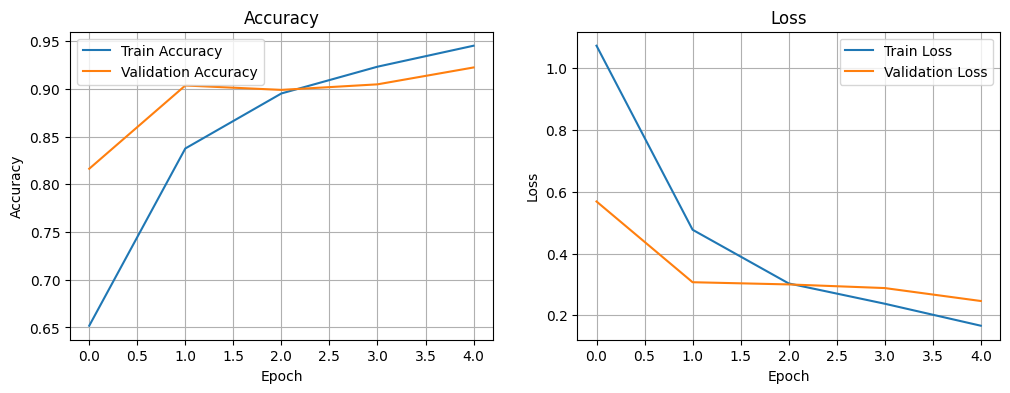

129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step


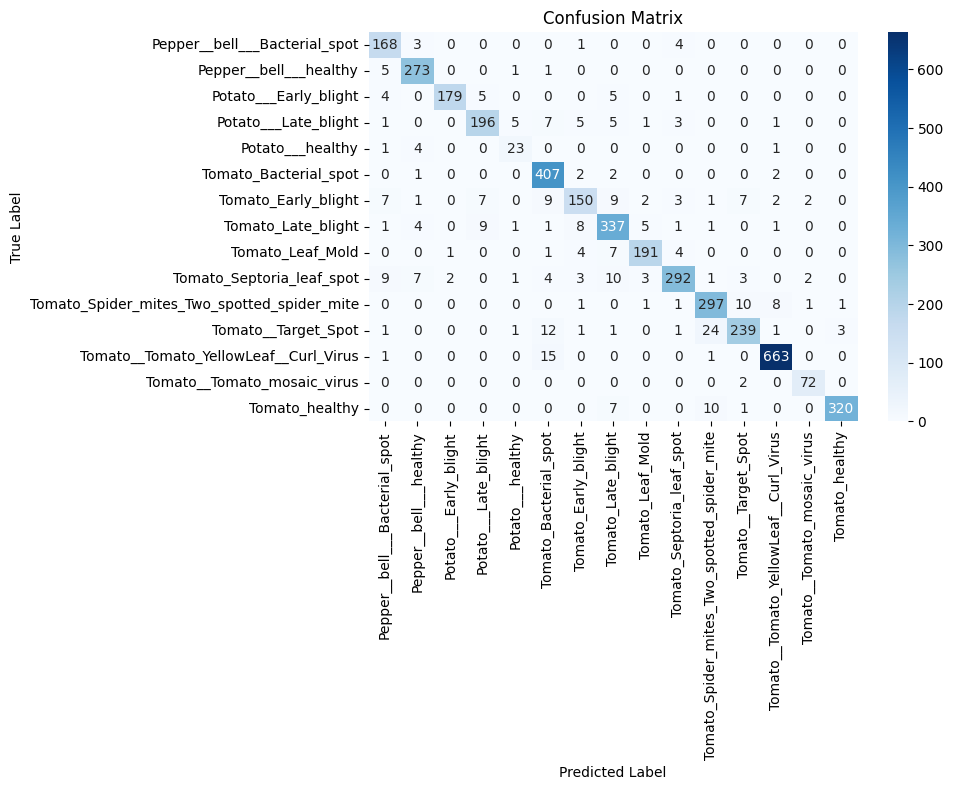

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataset_dir = '/kaggle/input/plantdisease/PlantVillage'
img_size = (128, 128)
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Labels:", class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(*img_size, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
val_images = []
val_labels = []

for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)
pred_probs = model.predict(val_images)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_labels
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()